Running in test mode with smaller matrices
Threads: 1, Time: 0.03 min
Threads: 2, Time: 0.02 min
Threads: 3, Time: 0.03 min
Threads: 4, Time: 0.02 min
Threads: 5, Time: 0.03 min
Threads: 6, Time: 0.03 min
Threads: 7, Time: 0.03 min
Threads: 8, Time: 0.03 min

Results Table:
 Threads  Time (min)
       1        0.03
       2        0.02
       3        0.03
       4        0.02
       5        0.03
       6        0.03
       7        0.03
       8        0.03


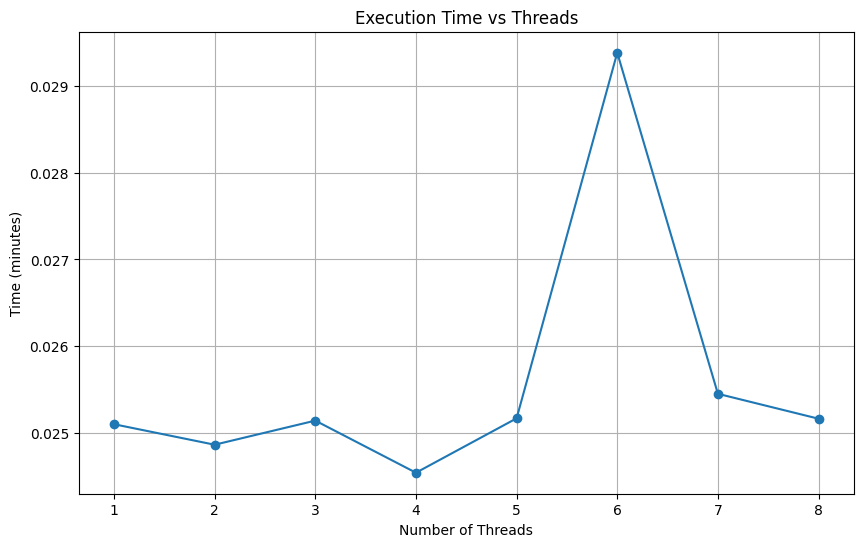


CPU Usage Summary:
Core
CPU 0    11.900
CPU 1    22.375
Name: Usage (%), dtype: float64


<Figure size 640x480 with 0 Axes>

In [2]:
import numpy as np
import time
import psutil
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt
from datetime import datetime

class MatrixBenchmark:
    def __init__(self, n_matrices=500, matrix_size=5000):
        self.n_matrices = n_matrices
        self.matrix_size = matrix_size
        self.constant_matrix = None
        self.cpu_data = []

    def matrix_multiply(self, i):
        random_matrix = np.random.rand(self.matrix_size, self.matrix_size)
        result = np.dot(random_matrix, self.constant_matrix)
        del random_matrix
        return None

    def monitor_cpu(self):
        cpu_percents = psutil.cpu_percent(interval=1, percpu=True)
        timestamp = datetime.now().strftime('%H:%M:%S')
        for core, usage in enumerate(cpu_percents):
            self.cpu_data.append({
                'Timestamp': timestamp,
                'Core': f'CPU {core}',
                'Usage (%)': usage
            })

    def run_benchmark(self, test_mode=True):
        if test_mode:
            self.n_matrices = 10
            self.matrix_size = 1000
            print("Running in test mode with smaller matrices")


        self.constant_matrix = np.ones((self.matrix_size, self.matrix_size))

        times = []
        threads = list(range(1, 9))
        results = {'Threads': [], 'Time (min)': []}

        for n_threads in threads:
            start_time = time.time()
            with ThreadPoolExecutor(max_workers=n_threads) as executor:
                list(executor.map(self.matrix_multiply, range(self.n_matrices)))
                self.monitor_cpu()

            elapsed = (time.time() - start_time) / 60
            times.append(elapsed)
            results['Threads'].append(n_threads)
            results['Time (min)'].append(round(elapsed, 2))
            print(f"Threads: {n_threads}, Time: {elapsed:.2f} min")

        results_df = pd.DataFrame(results)
        print("\nResults Table:")
        print(results_df.to_string(index=False))

        plt.figure(figsize=(10, 6))
        plt.plot(threads, times, 'o-')
        plt.title('Execution Time vs Threads')
        plt.xlabel('Number of Threads')
        plt.ylabel('Time (minutes)')
        plt.grid(True)
        plt.show()

        cpu_df = pd.DataFrame(self.cpu_data)
        print("\nCPU Usage Summary:")
        print(cpu_df.groupby('Core')['Usage (%)'].mean())
        results_df.to_csv('matrix_benchmark_results.csv', index=False)


        plt.savefig('execution_time_plot.png', dpi=300, bbox_inches='tight')


        cpu_df.groupby('Core')['Usage (%)'].mean().to_csv('cpu_usage_summary.csv')


benchmark = MatrixBenchmark()
benchmark.run_benchmark(test_mode=True)